## import required libraries

In [1]:
from duckduckgo_search import DDGS
from fastdownload import download_url
from fastcore.all import *
from fastai.vision.all import *
from time import sleep

search image function

In [2]:
def search_images(term, max_images=200):
    return L(DDGS().images(term, max_results=max_images)).itemgot("image")

In [15]:
def download_and_sleep(dest, search_term, max_images):
    print(f"downloading {dest.name} {search_term} images")
    download_images(dest, urls=search_images(f"{dest.name} {search_term} photo", max_images))
    sleep(10)

In [20]:
def download_samples(cats):
    for c in cats:
        download_url(search_images(f"{c} charcter photos", max_images=1)[0], f"{c}.jpg", show_progress=True)

        Image.open(f"{c}.jpg").to_thumb(256,256)

download images 

In [16]:
max_download = 100
classes = "warrior", "wizard", "taoist", "nerd"
path = Path("character_classes")

for c in classes:
    dest = path / c
    dest.mkdir(exist_ok=True, parents=True)
    # check number of files in directory 
    num_files = len(os.listdir(dest))
    if num_files >= max_download:
        print(f"skipping {c} image download as max image reached")
        continue
    # get ammount of images to download
    ammount = max_download - num_files 
    # split ammount in half and round up
    split_1 = math.ceil(ammount/2)
    download_and_sleep(dest, search_term="character", max_images=split_1)
    split_2 = ammount - split_1
    download_and_sleep(dest, search_term="character drawing", max_images=split_1)
    resize_images(path / c, max_size=400, dest=path / c)

downloading warrior character images
downloading warrior character drawing images


/home/vscode/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


downloading wizard character images
downloading wizard character drawing images


/home/vscode/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


downloading taoist character images
downloading taoist character drawing images


/home/vscode/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/vscode/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


downloading nerd character images
downloading nerd character drawing images


/home/vscode/.local/lib/python3.10/site-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

13

/home/vscode/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


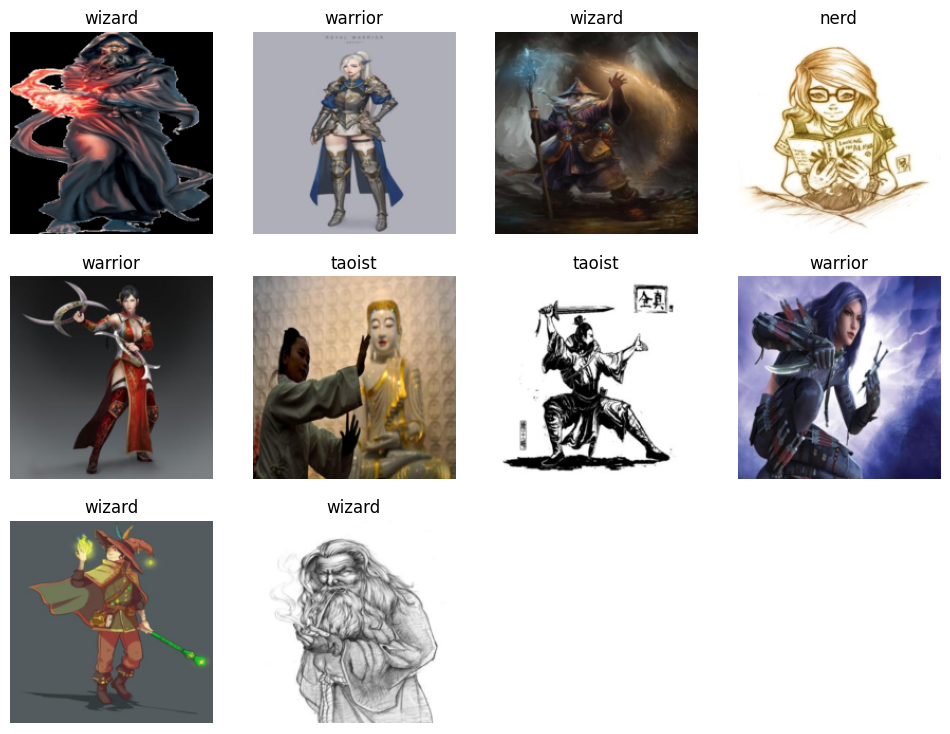

In [18]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method="squish")],
).dataloaders(path)

dls.show_batch(max_n=10)

## Train model

In [19]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,2.344865,1.615629,0.635135,00:13


epoch,train_loss,valid_loss,error_rate,time
0,1.323957,1.168357,0.432432,00:21
1,1.004887,1.062007,0.324324,00:21
2,0.771177,1.058948,0.324324,00:22


In [22]:
download_samples(classes)

In [30]:
is_char, _, probs = learn.predict(PILImage.create("nerd.jpg"))
print(f"This is a: {is_char}.")
print(f"Probability it's a nerd: {probs[0]:.4f}")

/home/vscode/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


This is a: nerd.
Probability it's a nerd: 0.9988


In [31]:
is_char, _, probs = learn.predict(PILImage.create("taoist.jpg"))
print(f"This is a: {is_char}.")
print(f"Probability it's a taoist: {probs[1]:.4f}")

/home/vscode/.local/lib/python3.10/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


This is a: taoist.
Probability it's a taoist: 0.9948


In [29]:
is_char, _, probs = learn.predict(PILImage.create("warrior.jpg"))
print(f"This is a: {is_char}.")
print(f"Probability it's a warrior: {probs[2]:.4f}")

This is a: warrior.
Probability it's a warrior: 0.9965


In [28]:
is_char, _, probs = learn.predict(PILImage.create("wizard.jpg"))
print(f"This is a: {is_char}.")
print(f"Probability it's a wizzard: {probs[3]:.4f}")

This is a: wizard.
Probability it's a wizzard: 0.9999
